In [ ]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [ ]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fake_df = pd.read_csv("/content/drive/MyDrive/SMU_Modules/Y4S2/Data Mining/project/data/archive/Fake.csv")
fake_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [ ]:
true_df = pd.read_csv("/content/drive/MyDrive/SMU_Modules/Y4S2/Data Mining/project/data/archive/True.csv")
true_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
# create new column that combines title and text together called title_text_combined
true_df['title_text_combined'] = true_df['title'] + " " + true_df['text']
# add response column and set to 1 for true dataset
true_df["response"] = 1
true_df.head()

,title,text,subject,date,title_text_combined,response
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017","As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Trump wants Postal Service to charge 'much mor...,1


In [ ]:
# create new column that combines title and text together called title_text_combined
fake_df['title_text_combined'] = fake_df['title'] + " " + fake_df['text']
# add response column and set to 1 for true dataset
fake_df["response"] = 0
fake_df.head()

,title,text,subject,date,title_text_combined,response
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Pope Francis Just Called Out Donald Trump Dur...,0


In [ ]:
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                21417 non-null  object
 1   text                 21417 non-null  object
 2   subject              21417 non-null  object
 3   date                 21417 non-null  object
 4   title_text_combined  21417 non-null  object
 5   response             21417 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1004.0+ KB


In [ ]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                23481 non-null  object
 1   text                 23481 non-null  object
 2   subject              23481 non-null  object
 3   date                 23481 non-null  object
 4   title_text_combined  23481 non-null  object
 5   response             23481 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.1+ MB


In [ ]:
# remove title, text, subject and date columns
fake_df.drop(["title", "text", "subject","date"],axis = 1,inplace = True)
true_df.drop(["title", "text", "subject","date"],axis = 1,inplace = True)

In [ ]:
# convert all text to lowercase
fake_df['title_text_combined'] = fake_df['title_text_combined'].apply(lambda x:x.lower())
true_df['title_text_combined'] = true_df['title_text_combined'].apply(lambda x:x.lower())


In [ ]:
# tokenization - this may take a while...
fake_df['title_text_combined'] = fake_df['title_text_combined'].apply(lambda x:word_tokenize(x))
true_df['title_text_combined'] = true_df['title_text_combined'].apply(lambda x:word_tokenize(x))


In [ ]:
# removing punctuation
import string
fake_df['title_text_combined'] = fake_df['title_text_combined'].apply(lambda x:[wrd for wrd in x if wrd not in string.punctuation])
true_df['title_text_combined'] = true_df['title_text_combined'].apply(lambda x:[wrd for wrd in x if wrd not in string.punctuation])
fake_df.head()

,title_text_combined,response
0,"[donald, trump, sends, out, embarrassing, new,...",0
1,"[drunk, bragging, trump, staffer, started, rus...",0
2,"[sheriff, david, clarke, becomes, an, internet...",0
3,"[trump, is, so, obsessed, he, even, has, obama...",0
4,"[pope, francis, just, called, out, donald, tru...",0


In [ ]:
# removing stopwords
stop_words = set(stopwords.words('english'))

fake_df['title_text_combined'] = fake_df['title_text_combined'].apply(lambda x:[wrd for wrd in x if wrd not in stop_words])
true_df['title_text_combined'] = true_df['title_text_combined'].apply(lambda x:[wrd for wrd in x if wrd not in stop_words])


In [ ]:
fake_df['title_text_combined'].head()

0    [donald, trump, sends, embarrassing, new, year...
1    [drunk, bragging, trump, staffer, started, rus...
2    [sheriff, david, clarke, becomes, internet, jo...
3    [trump, obsessed, even, obama, ’, name, coded,...
4    [pope, francis, called, donald, trump, christm...
Name: title_text_combined, dtype: object

In [ ]:
# generate word cloud for fake and true datasets
from wordcloud import WordCloud

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()



In [ ]:
from itertools import chain
# Generate word cloud from the 'text' column in fake_df
fake_text = ' '.join(list(chain.from_iterable(fake_df['title_text_combined'])))

# generate_wordcloud(' '.join(fake_df['title_text_combined']))

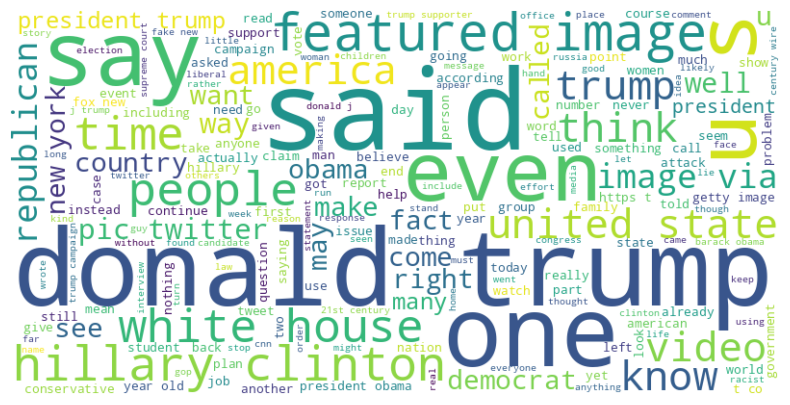

In [ ]:
# Generate word cloud from the 'text' column in fake_df
generate_wordcloud(fake_text)

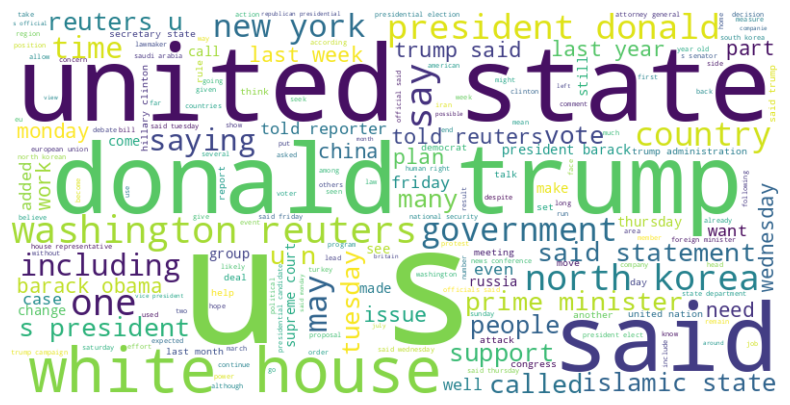

In [ ]:
# Generate word cloud from the 'text' column in true_df
true_text = ' '.join(list(chain.from_iterable(true_df['title_text_combined'])))
generate_wordcloud(true_text)

In [ ]:
from nltk.stem.porter import *
# stemming of words
stemmer = PorterStemmer()
fake_df['title_text_combined'] = fake_df['title_text_combined'].apply(lambda x:[stemmer.stem(wrd) for wrd in x])
true_df['title_text_combined'] = true_df['title_text_combined'].apply(lambda x:[stemmer.stem(wrd) for wrd in x])


In [ ]:
fake_df.head()
true_df.head()

,title_text_combined,response
0,"[u.s., budget, fight, loom, republican, flip, ...",1
1,"[u.s., militari, accept, transgend, recruit, m...",1
2,"[senior, u.s., republican, senat, 'let, mr., m...",1
3,"[fbi, russia, probe, help, australian, diploma...",1
4,"[trump, want, postal, servic, charg, 'much, am...",1


In [ ]:
# remove any empty tokens from both fake_df and true_df
fake_df['title_text_combined'] = fake_df['title_text_combined'].apply(lambda x:[wrd for wrd in x if wrd != ''])
true_df['title_text_combined'] = true_df['title_text_combined'].apply(lambda x:[wrd for wrd in x if wrd != ''])


In [ ]:
# POS tagging
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
fake_df_pos_tagged = fake_df['title_text_combined'].apply(lambda x:pos_tag(x))
true_df_pos_tagged = true_df['title_text_combined'].apply(lambda x:pos_tag(x))



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# lemmitization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
fake_df['title_text_combined'] = fake_df['title_text_combined'].apply(lambda x:[lemmatizer.lemmatize(wrd) for wrd in x])
true_df['title_text_combined'] = true_df['title_text_combined'].apply(lambda x:[lemmatizer.lemmatize(wrd) for wrd in x])

In [ ]:
fake_df.head()

,title_text_combined,response
0,"[donald, trump, send, embarrass, new, year, ’,...",0
1,"[drunk, brag, trump, staffer, start, russian, ...",0
2,"[sheriff, david, clark, becom, internet, joke,...",0
3,"[trump, ob, even, obama, ’, name, code, websit...",0
4,"[pope, franci, call, donald, trump, christma, ...",0


In [ ]:
true_df.head()

,title_text_combined,response
0,"[u.s., budget, fight, loom, republican, flip, ...",1
1,"[u.s., militari, accept, transgend, recruit, m...",1
2,"[senior, u.s., republican, senat, 'let, mr., m...",1
3,"[fbi, russia, probe, help, australian, diploma...",1
4,"[trump, want, postal, servic, charg, 'much, am...",1


In [ ]:
# merging fake and true dataframes together
merged_df = pd.concat([true_df, fake_df], ignore_index=True)
merged_df

,title_text_combined,response
0,"[u.s., budget, fight, loom, republican, flip, ...",1
1,"[u.s., militari, accept, transgend, recruit, m...",1
2,"[senior, u.s., republican, senat, 'let, mr., m...",1
3,"[fbi, russia, probe, help, australian, diploma...",1
4,"[trump, want, postal, servic, charg, 'much, am...",1
...,...,...
44893,"[mcpain, john, mccain, furiou, iran, treat, u,...",0
44894,"[justic, yahoo, settl, e-mail, privaci, class-...",0
44895,"[sunnistan, u, alli, ‘, safe, zone, ’, plan, t...",0
44896,"[blow, 700, million, al, jazeera, america, fin...",0


In [ ]:
merged_df['title_text_combined']


0        [u.s., budget, fight, loom, republican, flip, ...
1        [u.s., militari, accept, transgend, recruit, m...
2        [senior, u.s., republican, senat, 'let, mr., m...
3        [fbi, russia, probe, help, australian, diploma...
4        [trump, want, postal, servic, charg, 'much, am...
                               ...                        
44893    [mcpain, john, mccain, furiou, iran, treat, u,...
44894    [justic, yahoo, settl, e-mail, privaci, class-...
44895    [sunnistan, u, alli, ‘, safe, zone, ’, plan, t...
44896    [blow, 700, million, al, jazeera, america, fin...
44897    [10, u.s., navi, sailor, held, iranian, milita...
Name: title_text_combined, Length: 44898, dtype: object

In [ ]:
# join text back together
merged_df['title_text_combined'] = merged_df['title_text_combined'].apply(lambda content_list: ' '.join(content_list))

In [ ]:
merged_df.head()

,title_text_combined,response
0,u.s. budget fight loom republican flip fiscal ...,1
1,u.s. militari accept transgend recruit monday ...,1
2,senior u.s. republican senat 'let mr. mueller ...,1
3,fbi russia probe help australian diplomat tip-...,1
4,trump want postal servic charg 'much amazon sh...,1


In [ ]:
# vectorizing using tf-idf vectorizor
from sklearn.feature_extraction.text import TfidfVectorizer
X = merged_df['title_text_combined'].values
Y = merged_df['response'].values
print(X.shape)
print(Y.shape)

(44898,)
(44898,)


In [ ]:
# fitting vectoriser to X
vectoriser = TfidfVectorizer()
vectoriser.fit(X)


TfidfVectorizer()

In [ ]:
# transforming to vector values
X = vectoriser.transform(X)
print(X)

  (0, 104219)	0.03059713654381261
  (0, 103936)	0.025495284819857925
  (0, 103816)	0.043971728130510014
  (0, 102714)	0.040131728523912204
  (0, 102611)	0.018503030838050587
  (0, 101926)	0.033948887192693254
  (0, 101893)	0.05969268173936427
  (0, 101643)	0.019333762690811305
  (0, 101284)	0.02615028332340463
  (0, 101226)	0.020668952461513585
  (0, 101223)	0.04449715429307048
  (0, 101085)	0.034955702852528116
  (0, 101071)	0.04488203320129178
  (0, 100851)	0.019573254563356936
  (0, 100684)	0.03674844544998543
  (0, 100523)	0.07286686139934868
  (0, 100420)	0.06015293185362791
  (0, 99955)	0.08396973490298827
  (0, 98300)	0.018473933615960697
  (0, 98199)	0.029832409947008726
  (0, 97499)	0.01798674305202576
  (0, 96084)	0.022475780075971254
  (0, 95303)	0.0941290060644852
  (0, 95078)	0.12390013049996568
  (0, 94985)	0.04089250937563362
  :	:
  (44897, 13115)	0.027654829453985442
  (44897, 12649)	0.015820333600392485
  (44897, 12417)	0.018972313539222137
  (44897, 12090)	0.01600118

In [ ]:
# start splitting data into test and train sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,stratify=Y, random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape


((35918, 105475), (35918,), (8980, 105475), (8980,))

In [ ]:
# start training logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [ ]:
# evaluation of model on training data
y_pred_lr = model.predict(x_test)
lr_data_accuracy = accuracy_score(y_pred_lr, y_test)
print("Accuracy score of training data:",lr_data_accuracy)
print("Classification Report of training data:",classification_report(y_test, y_pred_lr))

Accuracy score of training data: 0.9903118040089087
Classification Report of training data:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [ ]:
df = merged_df.sample(frac=1,ignore_index=True)

In [ ]:
df.describe()

,response
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
# def preprocess_text(text):
#     text = text.lower()
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub("\\W"," ",text)
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#     text = re.sub('\n', '', text)
#     text = re.sub('\w*\d\w*', '', text)
#     return text

#     return preprocessed_text


In [ ]:
# df["text"] = df["text"].apply(preprocess_text)

In [ ]:
x = df["text"]
y = df["response"]

KeyError: 'text'

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

In [ ]:
# Tokenize the text data
max_words = 10000  #  Maximum number of words to consider
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
x_train_tokens = tokenizer.texts_to_sequences(x_train)
x_test_tokens = tokenizer.texts_to_sequences(x_test)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()

In [ ]:
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

model = LogisticRegression()

model.fit(x_train, y_train)

y_pred_lr = model.predict(x_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Accuracy:", accuracy_lr)
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))


In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)

# Step 5: Evaluate classifier performance
y_pred = rf_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# topic modelling